*   This is to support part V.C in our paper
*   Following code is used to analyze relationship between Tesla stock price and writer profile (based on the number of followers). We use Tesla as an example and apply the same for other stocks.



In [ ]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6

In [ ]:
company = pd.read_csv('Company.csv')
tweet_id = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
company_value = pd.read_csv('CompanyValues.csv')

In [ ]:
company_value['returns'] = company_value.sort_values('day_date').groupby(['ticker_symbol']).close_value.pct_change()
Tesla_value = company_value[company_value['ticker_symbol']=='TSLA'].sort_values('day_date')
Tesla_value.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,returns
16959,TSLA,2010-06-29,23.89,18751150,19.00,25.0000,17.54,NaN
16958,TSLA,2010-06-30,23.83,17165210,25.79,30.4192,23.30,-0.002512
16957,TSLA,2010-07-01,21.96,8216789,25.00,25.9200,20.27,-0.078473
16956,TSLA,2010-07-02,19.20,5135795,23.00,23.1000,18.71,-0.125683
16955,TSLA,2010-07-06,16.11,6858092,20.00,20.0000,15.83,-0.160937


In [ ]:
#We use code in file "Project Sentiment Analysis Setup" to run sentiment analysis for Tesla (it takes up 4 hours to do it). Then we saved it to csv file and re-import here. 
Tesla = pd.read_csv('/Users/17142/Desktop/Tesla_engagement update.csv')
Tesla.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,sentiment_scores,score
0,550793298357391360,TSLA,ScoutingGW,2015-01-01,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV...",0,0,3,3,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",Positive
1,550780769497808896,TSLA,SharePlanner,2015-01-01,2014 Was A Great Year of Trading In The Splash...,1,0,1,2,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",Positive
2,550703624544718848,TSLA,laurenholmesNYC,2015-01-01,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...,0,1,2,3,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",Positive
3,550676585393569792,TSLA,laurenholmesNYC,2015-01-01,$AAPL $ARWR $TSLA $BABA Wish everyone happy ne...,0,1,1,2,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",Positive
4,550673738161610752,TSLA,laurenholmesNYC,2015-01-01,$AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...,0,1,1,2,"{'neg': 0.087, 'neu': 0.74, 'pos': 0.173, 'com...",Positive


In [ ]:
#Merge Tesla tweet data and Tesla stock value table 
Tesla_tweet_vs_value =  pd.merge(Tesla, Tesla_value, left_on=["ticker_symbol",'post_date'], right_on = ['ticker_symbol','day_date'], how= "inner")
Tesla_tweet_vs_value.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,sentiment_scores,score,day_date,close_value,volume,open_value,high_value,low_value,returns
0,550793298357391360,TSLA,ScoutingGW,2015-01-01,"#bluechips like $TSLA, $AAPL, $DIS, $TWTR & NV...",0,0,3,3,"{'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'comp...",Positive,2015-01-01,222.41,2392947,223.09,225.68,222.25,0.0
1,550780769497808896,TSLA,SharePlanner,2015-01-01,2014 Was A Great Year of Trading In The Splash...,1,0,1,2,"{'neg': 0.0, 'neu': 0.82, 'pos': 0.18, 'compou...",Positive,2015-01-01,222.41,2392947,223.09,225.68,222.25,0.0
2,550703624544718848,TSLA,laurenholmesNYC,2015-01-01,Best Trade: $AAPL; $GOOG $TSLA $YHOO $LNKD I r...,0,1,2,3,"{'neg': 0.0, 'neu': 0.724, 'pos': 0.276, 'comp...",Positive,2015-01-01,222.41,2392947,223.09,225.68,222.25,0.0
3,550676585393569792,TSLA,laurenholmesNYC,2015-01-01,$AAPL $ARWR $TSLA $BABA Wish everyone happy ne...,0,1,1,2,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",Positive,2015-01-01,222.41,2392947,223.09,225.68,222.25,0.0
4,550673738161610752,TSLA,laurenholmesNYC,2015-01-01,$AAPL $TSLA $GILD $CELG $BABA $SCTY $RIG $WFM ...,0,1,1,2,"{'neg': 0.087, 'neu': 0.74, 'pos': 0.173, 'com...",Positive,2015-01-01,222.41,2392947,223.09,225.68,222.25,0.0


In [ ]:
Tesla_top_returns = Tesla_tweet_vs_value.sort_values('returns',ascending = False).head(3500)
Tesla_top_returns.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,sentiment_scores,score,day_date,close_value,volume,open_value,high_value,low_value,returns
1026722,1187214052952608768,TSLA,TeslaPodcast,2019-10-24,"2,000 word earnings recap going out to patrons...",6,7,141,154,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.2,0.176692
1026933,1187280596390817792,TSLA,ACInvestorBlog,2019-10-24,$TSLA rally could fuel $NIO shares. On watch.,1,1,14,16,"{'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.2,0.176692
1026941,1187285522802270209,TSLA,TeslaEV1,2019-10-24,Great thinking here. How's $tsla?,0,0,0,0,"{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.2,0.176692
1026940,1187285445475999744,TSLA,toniviola,2019-10-24,$tsla in Ludricrous Mode today.,0,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,2019-10-24,299.68,29819230,298.37,304.93,289.2,0.176692
1026939,1187285319261003781,TSLA,trader_53,2019-10-24,"the impact of ""other non-recurring items"" in $...",0,0,4,4,"{'neg': 0.167, 'neu': 0.701, 'pos': 0.132, 'co...",Negative,2019-10-24,299.68,29819230,298.37,304.93,289.2,0.176692


In [ ]:
#Get the number of followers from Twitter API account. The consumer key and token were changed for security purpose
import tweepy
from random import sample

consumer_key = 'WHnGEhaCXNP7HqcMMpoE2hW57'
consumer_secret = 'MRmlEdU4JI9NoQ2b5gm43DxncQ8kkjP61qTeGh06ezJBY70Ej0'
access_token = '1457933148969259012-zSgxOPyxhPsZnowTc8Cd3zpmMSlp5i'
access_secret = 'W1LlLz1byvV868GxOlRPvBDR3wjBMtezgHBOd5rslCnPP'
  
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

followers = []
Tesla_followers = Tesla_top_returns.sample(n=3200, replace=False)

for writer in Tesla_followers['writer']:
    try:
        user = api.get_user(screen_name=writer)
        followers.append(user.followers_count)
    except:
        followers.append(None)

Tesla_followers['followers'] = followers

Rate limit reached. Sleeping for: 775
Rate limit reached. Sleeping for: 774
Rate limit reached. Sleeping for: 771


In [ ]:
Tesla_write_vs_returns = Tesla_followers[Tesla_followers['followers'].notna()].sort_values('followers',ascending = False)
Tesla_write_vs_returns

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,total_engangement,sentiment_scores,score,day_date,close_value,volume,open_value,high_value,low_value,returns,followers
620587,1046715360194564097,TSLA,Reuters,2018-10-01,Tesla’s settlement with U.S. regulators gives ...,0,29,28,57,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",Positive,2018-10-01,310.70,21714210,305.77,311.44,301.05,0.173471,24028248.0
1028219,1187430268967231488,TSLA,jack,2019-10-24,Now anyone can buy $42 or even $1 worth of Ber...,298,589,0,887,"{'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,5898657.0
1028266,1187435460949356544,TSLA,CNBC,2019-10-24,Tesla is having its best day in 6 years—here's...,2,10,37,49,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,4404085.0
1026931,1187280062808129536,TSLA,ReutersBiz,2019-10-24,Tesla shares soar after posting surprise profi...,2,5,11,18,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,2290680.0
1027058,1187325361333460993,TSLA,ReutersBiz,2019-10-24,Tesla shares soar 21% as surprise profit answe...,4,5,23,32,"{'neg': 0.08, 'neu': 0.511, 'pos': 0.409, 'com...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,2290668.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027452,1187362678043484160,TSLA,GraysonMathis,2019-10-24,"+$3,500 & a 305% gain. Excellent earnings play...",1,0,2,3,"{'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,0.0
1026503,1187179463429251073,TSLA,chris_stearns,2019-10-24,@Nasdaq — YOUR NEW [mobile] WEBSITE SUCKS.We h...,0,1,1,2,"{'neg': 0.0, 'neu': 0.926, 'pos': 0.074, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,0.0
1026368,1187164600317501440,TSLA,LaughingBoner,2019-10-24,Nice call on $TSLA! Who cares about the stock ...,0,0,2,2,"{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'comp...",Positive,2019-10-24,299.68,29819230,298.37,304.93,289.20,0.176692,0.0
620953,1046744882159788033,TSLA,chris_stearns,2018-10-01,My future offspring right here.Priceless!$TSLA,0,0,5,5,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,2018-10-01,310.70,21714210,305.77,311.44,301.05,0.173471,0.0


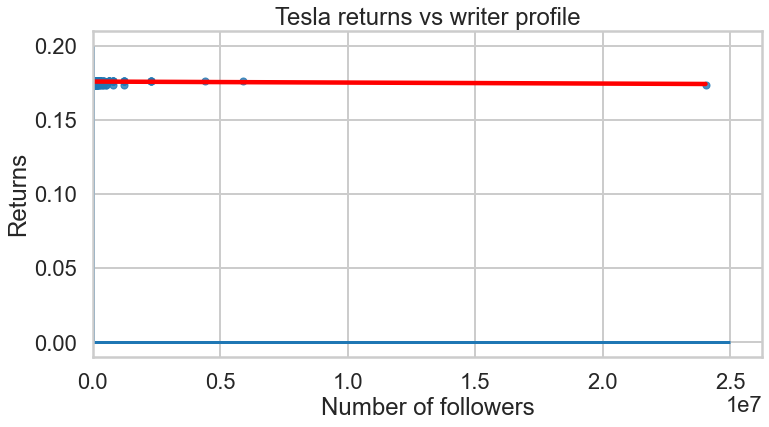

In [ ]:
#Visualine relationship between returns and writer profile (based on number of followers)
sns.regplot(x='followers', y="returns", data=Tesla_write_vs_returns, ci=None, scatter_kws={"s": 50},line_kws={'color':'red'})
plt.title("Tesla returns vs writer profile")
plt.xlabel('Number of followers')
plt.ylabel('Returns')
plt.hlines(y=0, xmin=0, xmax = 25000000)
plt.vlines(ymin=0, ymax=0.2,x = 0)
plt.show()

# CONCLUSION

We examined a list of writers who wrote their tweets on the day when the return was high. The result is that the profile of writers determined by their followers is not nessary correlated with returns. We